<a href="https://colab.research.google.com/github/Caleb-sb/DSP_Siamese_Model/blob/master/Neatened_DSP_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<u>**Necessary Imports:**</u>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets as dset, transforms
import matplotlib.pyplot as plt

import random
from random import randint
from google.colab import drive
from os import path

<u>**Importing dataset from Google Drive**</u>

In [ ]:
if (not path.exists('./test')):
  drive.mount('/content/drive')
  !cp -r ./drive/My\ Drive/SiameseFaces/train . 
  !cp -r ./drive/My\ Drive/SiameseFaces/test .

  #drive.flush_and_unmount()
  !rm -r ./sample_data
else: print("Dataset imported from Drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


<u>**Constants**</u>

In [ ]:
batch_size   =  60  #Divides nicely into 20287800
PER_CLASS    =  51
NUM_CLASSES  =  13
input_size   =  224
EPOCHS       =  1;

#Allowing for GPU use if cuda is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
print(device)

cuda:0


<u>**Neural Net Definition**</u>:

The net defined below will be incorporated as a Siamese network to facilitate facial recognition. It is a slightly adapted version of MobileNet V1, the structure for which can be found here: https://arxiv.org/abs/1704.04861


In [ ]:
class Net(nn.Module):
  '''The forward function defines what happens to one input. When evaluating, will call forward twice'''
  def __init__(self):
    super(Net, self).__init__();
    # Input channels, output channels, kernel size

    self.conv1  =  nn.Conv2d(3, 32, 3, stride=2, padding=1)
    self.bn1    =  nn.BatchNorm2d(32)
    self.conv2  =  nn.Conv2d(32, 32, 3, stride=1, groups=32, padding=1)
    self.bn2    =  nn.BatchNorm2d(32)
    self.conv3  =  nn.Conv2d(32, 64, 1, stride=1)
    self.bn3    =  nn.BatchNorm2d(64)
    self.conv4  =  nn.Conv2d(64, 64, 3, stride=2, groups=64, padding=1)
    self.bn4    =  nn.BatchNorm2d(64)
    self.conv5  =  nn.Conv2d(64, 128, 1, stride=1)
    self.bn5    =  nn.BatchNorm2d(128)
    self.conv6  =  nn.Conv2d(128, 128, 3, stride=1, groups=128, padding=1)
    self.bn6    =  nn.BatchNorm2d(128)
    self.conv7  =  nn.Conv2d(128, 128, 1, stride=1)
    self.bn7    =  nn.BatchNorm2d(128)
    self.conv8  =  nn.Conv2d(128, 128, 3, stride=2, groups=128, padding=1)
    self.bn8    =  nn.BatchNorm2d(128)
    self.conv9  =  nn.Conv2d(128, 256, 1, stride=1)
    self.bn9    =  nn.BatchNorm2d(256)
    self.conv10 =  nn.Conv2d(256, 256, 3, stride=1, groups=256, padding=1)
    self.bn10   =  nn.BatchNorm2d(256)
    self.conv11 =  nn.Conv2d(256, 256, 1, stride=1)
    self.bn11   =  nn.BatchNorm2d(256)
    self.conv12 =  nn.Conv2d(256, 256, 3, stride=2, groups=256, padding=1)
    self.bn12   =  nn.BatchNorm2d(256)
    self.conv13 =  nn.Conv2d(256, 512, 1, stride=1)
    self.bn13   =  nn.BatchNorm2d(512)
    self.conv14 =  nn.Conv2d(512, 512, 3, stride=1, groups=512, padding=1)
    self.bn14   =  nn.BatchNorm2d(512)
    self.conv15 =  nn.Conv2d(512, 512, 1, stride=1)
    self.bn15   =  nn.BatchNorm2d(512)
    self.conv16 =  nn.Conv2d(512, 512, 3, stride=1, groups=512, padding=1)
    self.bn16   =  nn.BatchNorm2d(512)
    self.conv17 =  nn.Conv2d(512, 512, 1, stride=1)
    self.bn17   =  nn.BatchNorm2d(512)
    self.conv18 =  nn.Conv2d(512, 512, 3, stride=1, groups=512, padding=1)
    self.bn18   =  nn.BatchNorm2d(512)
    self.conv19 =  nn.Conv2d(512, 512, 1, stride=1)
    self.bn19   =  nn.BatchNorm2d(512)
    self.conv20 =  nn.Conv2d(512, 512, 3, stride=1, groups=512, padding=1)
    self.bn20   =  nn.BatchNorm2d(512)
    self.conv21 =  nn.Conv2d(512, 512, 1, stride=1)
    self.bn21   =  nn.BatchNorm2d(512)
    self.conv22 =  nn.Conv2d(512, 512, 3, stride=1, groups=512, padding=1)
    self.bn22   =  nn.BatchNorm2d(512)
    self.conv23 =  nn.Conv2d(512, 512, 1, stride=1)
    self.bn23   =  nn.BatchNorm2d(512)
    self.conv24 =  nn.Conv2d(512, 512, 3, stride=2, groups=512, padding=1)
    self.bn24   =  nn.BatchNorm2d(512)
    self.conv25 =  nn.Conv2d(512, 1024, 1, stride=1)
    self.bn25   =  nn.BatchNorm2d(1024)
    self.conv26 =  nn.Conv2d(1024, 1024, 3, stride=1, groups=1024, padding=1)
    self.bn26   =  nn.BatchNorm2d(1024)
    self.conv27 =  nn.Conv2d(1024, 1024, 1, stride=1)
    self.bn27   =  nn.BatchNorm2d(1024)

    self.fc1    =  nn.Linear(in_features=1024,  out_features=1000);

    self.avg    =  nn.AvgPool2d(7, stride=1)

    self.relu   =  nn.ReLU()

  # The forward function will be run three times
  # Once for anchor, positive and negative
  def forward(self, x):
    
    x = self.relu(self.bn1(self.conv1(x)))
    x = self.relu(self.bn2(self.conv2(x)))
    x = self.relu(self.bn3(self.conv3(x)))
    x = self.relu(self.bn4(self.conv4(x)))
    x = self.relu(self.bn5(self.conv5(x)))
    x = self.relu(self.bn6(self.conv6(x)))
    x = self.relu(self.bn7(self.conv7(x)))
    x = self.relu(self.bn8(self.conv8(x)))
    x = self.relu(self.bn9(self.conv9(x)))
    x = self.relu(self.bn10(self.conv10(x)))
    x = self.relu(self.bn11(self.conv11(x)))
    x = self.relu(self.bn12(self.conv12(x)))
    x = self.relu(self.bn13(self.conv13(x)))
    x = self.relu(self.bn14(self.conv14(x)))
    x = self.relu(self.bn15(self.conv15(x)))
    x = self.relu(self.bn16(self.conv16(x)))
    x = self.relu(self.bn17(self.conv17(x)))
    x = self.relu(self.bn18(self.conv18(x)))
    x = self.relu(self.bn19(self.conv19(x)))
    x = self.relu(self.bn20(self.conv20(x)))
    x = self.relu(self.bn21(self.conv21(x)))
    x = self.relu(self.bn22(self.conv22(x)))
    x = self.relu(self.bn23(self.conv23(x)))
    x = self.relu(self.bn24(self.conv24(x)))
    x = self.relu(self.bn25(self.conv25(x)))
    x = self.relu(self.bn26(self.conv26(x)))
    x = self.relu(self.bn27(self.conv27(x)))
    
    x = self.avg(x)
    
    x = x.view(-1, 1024)   
    
    x = self.fc1(x)

    return x

<u>**Training Helper Functions:**</u>

The functions below load an array with all possible triplet combinations in the dataset as indices to help save space. The triple loader fetches the images in batches from the training dataset, yeilding a batch at a time.

In [ ]:
#Code to ensure no duplicates in training and to allow for epochs

def load_indices(dataset):
  '''This function loads training indices to cover all possible training samples'''
  training_indices = []
  samples = [-1, -1, -1] 
  for i in range(dataset.__len__()):
    samples[0] = i;
    pos_class = list(range((int(i/51))*51, (int(i/51))*51+51))
    for j in pos_class:
      if (j != i):
        samples[1] = j
        for k in range(0, dataset.__len__()):
          if (not(k in pos_class)):
            samples[2] = k
            training_indices.append([samples[0], samples[1], samples[2]])
  return training_indices



def siamese_triple_loader(dataset, batch_size=1, shuffle=True):
  '''This function generates a minibatch of pos, neg and anchor images'''
  training_indices = load_indices(dataset)

  train_order = list(range(0, (NUM_CLASSES-1)*(PER_CLASS-1)*(PER_CLASS)*(NUM_CLASSES*PER_CLASS)))
  test_counter = 0;
  for epoch in range(EPOCHS):
    if (shuffle):
      random.shuffle(train_order)
    batch = torch.empty(batch_size, 3, 3, input_size, input_size)
    for index in range(0,  len(train_order)):
      for i in range(batch_size):
        batch[i][0], anchor = dataset.__getitem__(training_indices[train_order[index]][0])
        
        batch[i][1], pos = dataset.__getitem__(training_indices[train_order[index]][1])
        batch[i][2], neg = dataset.__getitem__(training_indices[train_order[index]][2])
        index+=1
      yield batch

<u>**Evaluation Function**</u>

The avgDistance function was intended for use during training and would have evaluated the model every 100 batches. However, due to Google Colab's memory constraints, a different solution, shown in the <u>Evaluation Process</u> code block was used.

In [ ]:
def avgDistances(dataset, model):
  '''This function evals the model by calculating the avg distances between negs
  (bigger is better) and the avg distances between positives (smaller better)'''
  check         =  nn.PairwiseDistance()
  count         =  0
  count2        =  0
  sum_same      =  0
  sum_different =  0
    
  for outer in range(204): #gives 10404 tests
    out1 = (model((eval_dataset.__getitem__(outer)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
    for inner in range(0,204,4):
      out2 = (model((eval_dataset.__getitem__(inner)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
      if ((int)(inner/51) == (int)(outer/51)):
        sum_same += check(out1, out2)
        count += 1
      elif ((int)(inner/51) != (int)(outer/51)):
        sum_different += check(out1, out2)
        count2 += 1
      else: print('Error: ', outer, inner)

  return sum_same/count, sum_different/count2

<u>**Necessary Training Variables:**</u>

In [ ]:
# Transforms for the training input images
input_transforms = transforms.Compose([
                            transforms.CenterCrop((500,500)),
                            transforms.Resize((input_size, input_size)),
                            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=(-0.1, 0.1)),
                            transforms.ToTensor()
                                     ])

train_dataset =  dset.ImageFolder(root="./train", transform=input_transforms)
dataloader    =  siamese_triple_loader(train_dataset, batch_size)
LR            =  0.001
model         =  Net().to(device)
criterion     =  nn.TripletMarginLoss(reduction='mean',margin=1, p=2)

model.train()

optimizer     =  optim.SGD(model.parameters(), lr=LR)

# For graphing the losses afterwards
all_losses = torch.empty(1)

<u>**Training Process:**</u>

The batches of triplets are fetched from the customised training dataloader generator. They are passed to the model one batch at a time. First the batch of anchors, the batch of positives and then the batch of negatives. The loss is then calculated using TripletMarginLoss for the entire batch at the same time.

In [ ]:
# Training loop, uses the dataloader generator
for i_batch, batch in enumerate(dataloader):
  
  # Saving the model, even the untrained version
  if (i_batch%100 == 0):
    model_name = str(i_batch)+"_Siamese_Model_2D(1:52PM)"+str(LR)+"_.pt"
    PATH = "./drive/My Drive/"+str(model_name)
    torch.save(model.state_dict(), PATH)

  #Training model
  model.train()
  loss = 0
  optimizer.zero_grad()
  batch = batch.view(3,batch_size,3,input_size, input_size)
    
  anchors    = batch[0].to(device)
  positives  = batch[1].to(device)
  negatives  = batch[2].to(device)

  anchor_outs   = model(anchors)
  pos_outs      = model(positives)
  neg_outs      = model(negatives)

  # Getting all the loss over the whole batch and performing mean reduction
  loss += criterion(anchor_outs, pos_outs, neg_outs)
  
  # Printing batch number and loss for that batch
  print('Batch number: ', i_batch+1)
  print('Accumulated loss: ', loss.item())
  print('--------------------------------------')
  print('\n')
    
  # For graphing post training
  all_losses = torch.cat((all_losses, torch.as_tensor(loss.item()).view(1)), 0)

  # Backprop and adjusting weights
  loss.backward()
  optimizer.step()

<u>**Plotting the losses:**</u>

The loss graph will be quite noisy since we are using batches of size 60 as opposed to the entire training set.

In [ ]:
fig=plt.figure(figsize=(19, 12), dpi= 80, facecolor='w', edgecolor='k')

# Skip 1st index when plotting since this is the value from torch.empty(1)
plt.plot(all_losses[1:1000])
plt.show

<u>**Necessary Evaluation Variables:**</u>

For each quicktest, using a subset of the test dataset, the model_name was changed to fetch the correct models from Google Drive.

In [ ]:
# Transforms and dataset for evaluation and testing
eval_transforms  =   transforms.Compose([
                                       transforms.CenterCrop((500,500)),
                                       transforms.Resize((input_size, input_size)),
                                       transforms.ToTensor()
                                       ])
eval_dataset     =   dset.ImageFolder(root="./test", transform=eval_transforms)

# Outputs of testing and evaluation
threshold        =  2
check            =  nn.PairwiseDistance()
correct          =  0
false_negative   =  0
false_positive   =  0
avg_distance_sum =  0

# Loading in the trained model from Google Drive
model            =   Net()
model_name       =   "600_Siamese_Model_UsedOldLR(9:20AM)0.001_.pt"
PATH             =   "./drive/My Drive/ConvergedModel/"+str(model_name)

model.load_state_dict(torch.load(PATH))
model.to(device)
model.eval()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=64)
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
  (bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=128)
  (bn6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats

<u>**Evaluation Process:**</u>

Due to Google Colab's memory constraints, the models could not be evaluated during training. Therefore, they were saved every 100 batches (6000 Triplets, 18 000 images) and were evaluated for accuracy using a subset of the testing data.

In [ ]:
# Full test loop gives 93 636 tests 
# (change to range(1, eval_dataset.__len__(), 12) on the outer loop and range(0, eval_dataset.__len__(), 6) 
# on the inner loop to perform 1 250 quicktests)
for outer in range(0, eval_dataset.__len__()): 
  out1 = (model((eval_dataset.__getitem__(outer)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')

  for inner in range(0, eval_dataset.__len__()):
    out2 = (model((eval_dataset.__getitem__(inner)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')

    if (check(out1, out2) < threshold and (int)(inner/51) == (int)(outer/51)):
      correct+=1
    elif (check(out1, out2) > threshold and (int)(inner/51) == (int)(outer/51)):
      false_negative+=1
    elif (check(out1, out2) < threshold and (int)(inner/51) != (int)(outer/51)):
      false_positive +=1
    elif (check(out1, out2) > threshold and (int)(inner/51) != (int)(outer/51)):
      correct +=1  
    else: print('Error: ', outer, inner)

  print('Eval Accuracy: ', (float)(correct/(correct+false_positive+false_negative)))
  print('Correct: ', correct)
  print('False Positives: ', false_positive)
  print('False Negatives: ', false_negative)
  print('---------------------------------------------')


Eval Accuracy:  0.9575163398692811
Correct:  293
False Positives:  4
False Negatives:  9
---------------------------------------------
Eval Accuracy:  0.9689542483660131
Correct:  593
False Positives:  9
False Negatives:  10
---------------------------------------------


KeyboardInterrupt: ignored

<u>**Plotting the accuracies:**</u>

The code below just plots the accuracies which were collected from the previous code block. These are for the quick tests which compare 1250 pairs from a possible 93 636 pairs in the test dataset. The batch numbers are the number of batches each trained model had seen.

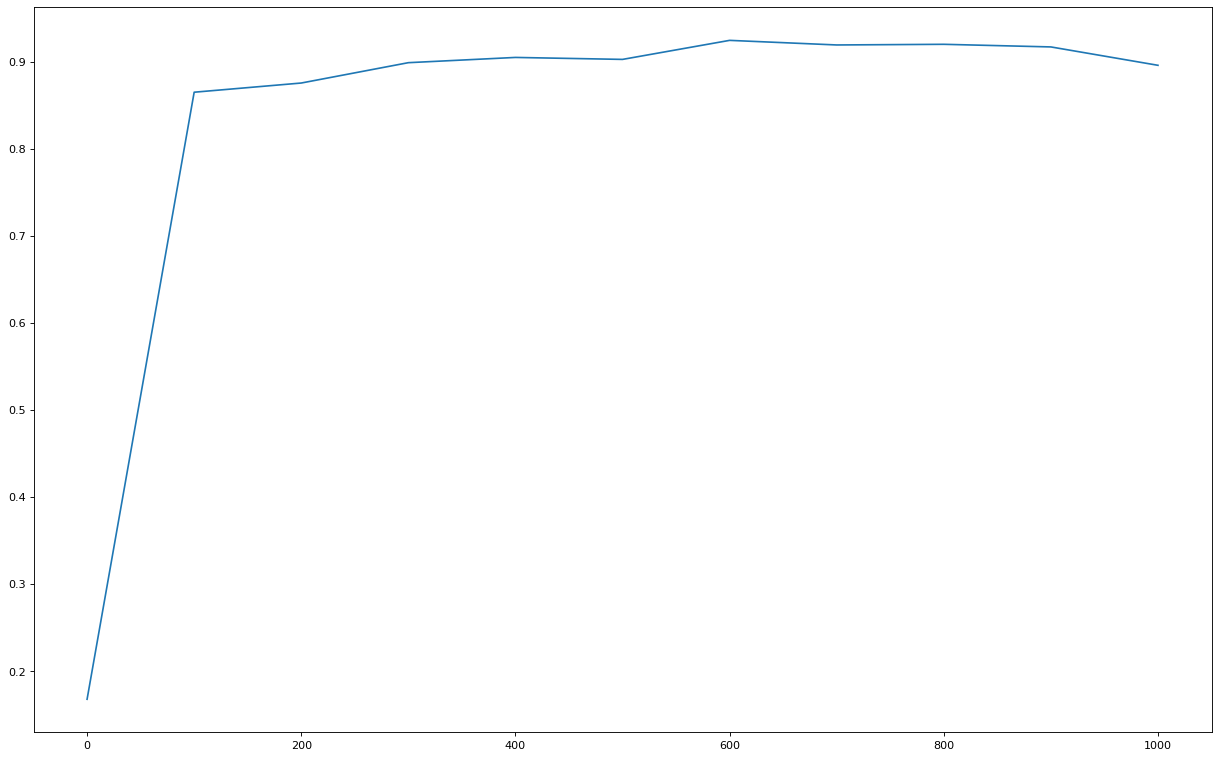

In [ ]:
fig        =  plt.figure(figsize=(19, 12), dpi= 80, facecolor='w', edgecolor='k')
accuracies =  [0.167430814479638, 0.865007541478129, 0.875565610859728, 0.89894419306184, 0.90497737556561, 0.902714932126696, 0.924585218702865, 0.919306184012066, 0.920060331825037, 0.917043740573152, 0.895927601809954]
batches    =  [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

plt.plot(batches, accuracies)
plt.show()

<u>**Image Examples:**</u>

The code below takes example pairs of images from the dataset and determines whether or not they are matched. An example can be found in Figure .

		        MATCH


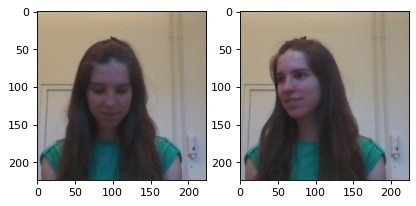

		      NO MATCH


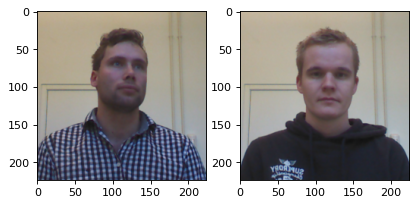

		        MATCH


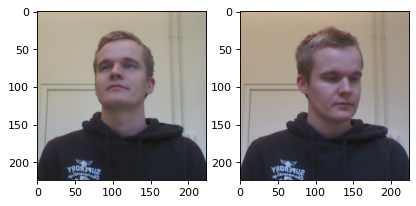

In [ ]:
for i in range(3):
  TEST1 =  randint(0, 305)
  TEST2 =  randint(0, 305)

  fig   =  plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
  fig.add_subplot(1,2,1)
  plt.imshow(eval_dataset.__getitem__(TEST1)[0].permute(1,2,0))

  fig.add_subplot(1,2,2)
  plt.imshow(eval_dataset.__getitem__(TEST2)[0].permute(1,2,0))

  out1 = model((eval_dataset.__getitem__(TEST1)[0].view(1,3,input_size,input_size)).to(device))
  out2 = model((eval_dataset.__getitem__(TEST2)[0].view(1,3,input_size,input_size)).to(device))
  eval_dist = nn.PairwiseDistance()

  if (eval_dist(out1, out2).item() > 2):
      print("\t\t      NO MATCH")
  else:
      print("\t\t        MATCH")
  
  plt.show()

<u>**Checking Average Distances:**</u>

The code to measure average distances is shown below. This tests the average distance between the 1000 point vectors output by the net for images in the same class. The code can be changed as explained by the comments below in order to measure average different-class distances. The different class measurement simply measures the distances between outputs of the net from one class to another. It's performed in this way in order to match the number of measurements made for checking the same class distances. Both averages are therefore calculated for $1275\times6$ measurements

In [ ]:
check            =  nn.PairwiseDistance()
count            =  0
avg_distance_sum =  0

# Loop range can be changed to measure distances between images in different classes: 
# outer in range(51), inner in range(51, 102, 2)
for outer in range(51): #gives 1275 tests
  out1 = (model((eval_dataset.__getitem__(outer)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
  for inner in range(0, 51, 2):
    out2 = (model((eval_dataset.__getitem__(inner)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
    avg_distance_sum += check(out1, out2).item()
    count+=1

# outer in range(51, 102), inner in range(102, 153, 2)
for outer in range(51, 102): #gives 1275 tests
  out1 = (model((eval_dataset.__getitem__(outer)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
  for inner in range(51, 102, 2):
    out2 = (model((eval_dataset.__getitem__(inner)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
    avg_distance_sum += check(out1, out2).item()
    count+=1

# outer in range(102, 153), inner in range(153, 204, 2)
for outer in range(102, 153): #gives 1275 tests
  out1 = (model((eval_dataset.__getitem__(outer)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
  for inner in range(102, 153, 2):
    out2 = (model((eval_dataset.__getitem__(inner)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
    avg_distance_sum += check(out1, out2).item()
    count+=1

# outer in range(153, 204), inner in range(204, 255, 2)
for outer in range(153, 204): #gives 1275 tests
  out1 = (model((eval_dataset.__getitem__(outer)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
  for inner in range(153, 204, 2):
    out2 = (model((eval_dataset.__getitem__(inner)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
    avg_distance_sum += check(out1, out2).item()
    count+=1

# outer in range(204, 255), inner in range(255, 306, 2)
for outer in range(204, 255): #gives 1275 tests
  out1 = (model((eval_dataset.__getitem__(outer)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
  for inner in range(204, 255, 2):
    out2 = (model((eval_dataset.__getitem__(inner)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
    avg_distance_sum += check(out1, out2).item()
    count+=1

# outer in range(255, 306), inner in range(0, 51, 2)
for outer in range(255, 306): #gives 1275 tests
  out1 = (model((eval_dataset.__getitem__(outer)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
  for inner in range(255, 306, 2):
    out2 = (model((eval_dataset.__getitem__(inner)[0].view(1,3,input_size,input_size)).to(device))).to('cpu')
    avg_distance_sum += check(out1, out2).item()
    count+=1

print("AVG SAME DISTANCE: ", avg_distance_sum/count)

AVG SAME DISTANCE:  1.909480437480321
